# Neral Networks

## Exercise 4.1 NOR-Gate

I haven't comented my code becouse i think i named it clearly and does not need ferther explenation, where i think it does need comments i made a # NOTE ..

In [257]:
# All the imports
import math
from typing import Callable
import random
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

i think the code is clear enough here without any adidtional comments :)

Note: i need to make shure i alwas use the corect size of input otherwise you get errors, i started with building error code but this takes a lot of time and takes away of the core asingment so i left them out, it does not help me understhand this concept better >-<

In [223]:
def dot_product(x : list[int], waiths : list[int]) -> int:
    return sum(val * waith for val, waith in zip(x, waiths))


def perceptron(x : list[int], weights : list[int], bias : int) -> bool:
    weighted_sum = dot_product(x, weights) + bias
    return 1 if weighted_sum >= 0 else 0


def nor_gate(x : list[int]) -> bool :
    weights = [-1] * len(x)
    bias = 0.1
    return perceptron(x, weights, bias)


print("NOR gate")
print("x1 x2 x3 | Output")
for a in [0, 1]:
    for b in [0, 1]:
        for c in [0,1]:
            output  = nor_gate([a, b, c])
            print(f"{a}  {b}  {c}  |   {output}")


NOR gate
x1 x2 x3 | Output
0  0  0  |   1
0  0  1  |   0
0  1  0  |   0
0  1  1  |   0
1  0  0  |   0
1  0  1  |   0
1  1  0  |   0
1  1  1  |   0


## Exercise 4.2 ADDER
there is the xore gate problem, you can't make it with one peceptron since it has 2 different treshholds but you can with multiple
and with the xor gate you can make the adder, i think the code als speaks for itself here

In [224]:
def or_gate(x : list[int]):
    weights = [1] * len(x)
    bias = -0.1
    return perceptron(x, weights, bias)


def and_gate(x : list[int]):
    weights = [1] * len(x)
    bias = -len(x) + 0.5
    return perceptron(x, weights, bias)


def xor_gate(a : bool , b : bool):
    p1 = perceptron([a, b], [1, -1], -0.5) # A and NOT B 
    p2 = perceptron([a, b], [-1, 1], -0.5) # NOT A and B 
    return perceptron([p1, p2], [1, 1], -0.5)


def adder(a, b, cary_in):
    sum_out = xor_gate(xor_gate(a, b), cary_in)
    carry_out =  or_gate([and_gate([a, b]), and_gate([cary_in , xor_gate(a, b)])])
    return sum_out, carry_out


print("A B Cin | Sum Cout")
for a in [0, 1]:
    for b in [0, 1]:
        for c in [0,1]:
            s, cout = adder(a, b, c)
            print(f"{a} {b}  {c}  |  {s}   {cout}")


A B Cin | Sum Cout
0 0  0  |  0   0
0 0  1  |  1   0
0 1  0  |  1   0
0 1  1  |  0   1
1 0  0  |  1   0
1 0  1  |  0   1
1 1  0  |  0   1
1 1  1  |  1   1


## Exercise 4.3 A) Neuron
Here i made the first neuron, this neuron safes its own values and can compute the output using the forward function, nothing smart about this yet >-< \
i used the step function here as activation since we just want yes or no and we are not learing yet

In [225]:
def step(x: float):
    return 1 if x >= 0 else 0


class Neuron_a:
    def __init__(self, num_inputs : int) -> None :
        self.num_inputs : int = num_inputs
        self.weights : list[float] = [1 for _ in range(num_inputs)]
        self.bias : float = 0
        self.activation_function : Callable[[float], float]  = step

    def set_weights(self, new_weights: list[float]) -> None:
        if len(new_weights) != self.num_inputs:
            raise ValueError(f"Expected {self.num_inputs} weights, but got {len(new_weights)}.")
        self.weights = new_weights

    def set_bias(self, new_bias) -> None:
        self.bias = new_bias

    def forward(self, inputs : list[float]) -> float :
        if len(inputs) != self.num_inputs:
            raise ValueError(f"Expected {self.num_inputs} weights, but got {len(inputs)}.")
        weighted_sum = dot_product(inputs, self.weights) + self.bias
        return self.activation_function(weighted_sum)


nor_gate_2 = Neuron_a(3)
nor_gate_2.set_weights([-1, -1, -1])
nor_gate_2.set_bias(0.1)

print("NOR gate")
print("x1 x2 x3 | Output")
for a in [0, 1]:
    for b in [0, 1]:
        for c in [0,1]:
            output  = nor_gate_2.forward([a, b, c])
            print(f"{a}  {b}  {c}  |   {output}")


NOR gate
x1 x2 x3 | Output
0  0  0  |   1
0  0  1  |   0
0  1  0  |   0
0  1  1  |   0
1  0  0  |   0
1  0  1  |   0
1  1  0  |   0
1  1  1  |   0


## Exercise 4.3 B) Delta Rule

since we are starting with the learing the step function would not be the best choice anymore, so i switched to the sigmoid for my second neuron. \
Now i made an update function useing the delta, to compute the dela we take the derivative of the activation function and the current error \
with this delta we know how big of a step we need to take \
then we ajust the weights with the learning rate, te calculated delta and the inputs to see witch input has a big impact \
\
if you want to see the weights and bias change uncomand the  # print(nor_gate_self_learning)  line

In [226]:
def dot_product(values: list[float], weights: list[float]) -> float:
    return sum(val * weight for val, weight in zip(values, weights))

def sigmoid(x: float) -> float:
    return 1 / (1 + math.exp(-x))

class Neuron_b:
    def __init__(self, num_inputs : int) -> None :
        self.weights : list[float] = [1 for _ in range(num_inputs)]
        self.bias : float = 0
        self.activation_function : Callable[[float], float]  = sigmoid
        self.activation_derivative : Callable[[float], float] = lambda x: sigmoid(x) * (1 - sigmoid(x))

    def forward(self, inputs : list[float]) -> float :
        weighted_sum = dot_product(inputs, self.weights) + self.bias
        output = self.activation_function(weighted_sum)
        return output, weighted_sum
    
    def update(self, inputs: list[float], desired_output: float, learning_rate: float) -> None:
        actual_output, weighted_sum = self.forward(inputs)
        error = desired_output - actual_output
        delta = error * self.activation_derivative(weighted_sum)
        for j, _ in enumerate(self.weights):
            self.weights[j] += learning_rate * delta * inputs[j]
        self.bias += learning_rate * delta

    def __str__(self):
        return f"Weights: {self.weights}, Bias: {self.bias}"


nor_gate_self_learning = Neuron_b(3)

for _ in range(200):
    for a in [0, 1]:
        for b in [0, 1]:
            for c in [0,1]:
                wanted_output = nor_gate_2.forward([a, b, c]) # NOTE: use the old nor gate to get the correct output to lean on
                nor_gate_self_learning.update([a,b,c], wanted_output, .5)
                # print(nor_gate_self_learning) #NOTE: uncomment this when you want to see the weights and bias change
            
print("NOR gate")
print("x1 x2 x3 | Output")
for a in [0, 1]:
    for b in [0, 1]:
        for c in [0,1]:
            output, _ = nor_gate_self_learning.forward([a, b, c])
            print(f"{a}  {b}  {c}  |   {round(output)}  -  {output}")

NOR gate
x1 x2 x3 | Output
0  0  0  |   1  -  0.7270646845222616
0  0  1  |   0  -  0.12798270477202733
0  1  0  |   0  -  0.1291029095949694
0  1  1  |   0  -  0.008101201292762886
1  0  0  |   0  -  0.1303371480882696
1  0  1  |   0  -  0.008189527635955218
1  1  0  |   0  -  0.008271154124201005
1  1  1  |   0  -  0.00045928950732702396


## Exercise 4.3 C) Backpropagation

I ajusted the neuron a bit so i find it easyer to use in a full network (delta outside of neuron to compute next layer), i started with making a fixed network with 2 hidden layers and one output layer \
the working behind it is the same as before but now we connect multiple nerons to create a nearal network \
\
i made a function to calculate the cost to so we can see how wel my networks peforms \
\
The bachwards function is the function that runs true the whole nerwork and then computes the results back to ajust the weights and biases of every neuron, \
it computes the error of the previouse layer using the delta's of its previouse layer \
\
then i have a train function that just runs the input for the amount of epoch's true the network and updates the neurons 
\
The output here is what i find intresing, i run it multiple times and most of the time its verry acurate, but sometimes i get an output like: \
Testing: \
Input: [0, 0], Output rounded: [0], origal output: [0.023104960889323376] \
Input: [0, 1], Output rounded: [1], origal output: [0.6626025861724977] \
Input: [1, 0], Output rounded: [1], origal output: [0.6626618181881688] \
Input: [1, 1], Output rounded: [1], origal output: [0.6575807758518882] \
Cost: 0.08257254746915843 \
now you can clearly see that one neuron triggers the one and its leared to recocnice a 1 in the input \
\
but most of the time it looks like this: \
Testing: \
Input: [0, 0], Output rounded: [0], origal output: [0.01650320227187819] \
Input: [0, 1], Output rounded: [1], origal output: [0.9863814085080396] \
Input: [1, 0], Output rounded: [1], origal output: [0.9863933414524142] \
Input: [1, 1], Output rounded: [0], origal output: [0.017566939337392545] \
Cost: 0.00011894502924570524 \


In [227]:
class Neuron_d:
    def __init__(self, num_inputs: int) -> None:
        self.weights: list[float] = [random.uniform(0, 1) for _ in range(num_inputs)]
        self.bias: float = random.uniform(-1, 0)
        self.activation_function : Callable[[float], float]  = sigmoid
        self.activation_derivative : Callable[[float], float] = lambda x: sigmoid(x) * (1 - sigmoid(x))
        self.weighted_sum : float = 0
        self.output : float = 0

    def forward(self, inputs: list[float]) -> float:
        self.weighted_sum = dot_product(inputs, self.weights) + self.bias
        self.output = self.activation_function(self.weighted_sum)
        return self.output

    def update(self, inputs: list[float], delta: float, learning_rate: float) -> None:
        for j, _ in enumerate(self.weights):
            self.weights[j] += learning_rate * delta * inputs[j]
        self.bias += learning_rate * delta


class first_neural_network:
    def __init__(self, num_inputs: int, num_notes_hidden_layers: int, num_of_outputs: int):
        self.hidden_layer_1 = [Neuron_d(num_inputs) for _ in range(num_notes_hidden_layers)]
        self.hidden_layer_2 = [Neuron_d(num_notes_hidden_layers) for _ in range(num_notes_hidden_layers)]
        self.output_layer = [Neuron_d(num_notes_hidden_layers) for _ in range(num_of_outputs)]

    def forward(self, inputs: list[float]) -> list[float]:
        hidden_1_outputs = [neuron.forward(inputs) for neuron in self.hidden_layer_1]
        hidden_2_outputs = [neuron.forward(hidden_1_outputs) for neuron in self.hidden_layer_2]
        output_layer_outputs = [neuron.forward(hidden_2_outputs) for neuron in self.output_layer]
        return output_layer_outputs

    def backward(self, inputs: list[float], wanted_output: list[float], learning_rate: float) -> None:
        hidden_1_outputs = [neuron.forward(inputs) for neuron in self.hidden_layer_1]
        hidden_2_outputs = [neuron.forward(hidden_1_outputs) for neuron in self.hidden_layer_2]
        output_layer_outputs = [neuron.forward(hidden_2_outputs) for neuron in self.output_layer]

        delta_output = []
        for i, neuron in enumerate(self.output_layer):
            error = wanted_output[i] - neuron.output
            delta = error * neuron.activation_derivative(neuron.weighted_sum)
            delta_output.append(delta)
            neuron.update(hidden_2_outputs, delta, learning_rate)

        deltas_hidden_2 = []
        for i, neuron in enumerate(self.hidden_layer_2):
            error = sum(delta_output[j] * self.output_layer[j].weights[i] for j in range(len(self.output_layer)))
            delta = error * neuron.activation_derivative(neuron.weighted_sum)
            deltas_hidden_2.append(delta)
            neuron.update(hidden_1_outputs, delta, learning_rate)

        deltas_hidden_1 = []
        for i, neuron in enumerate(self.hidden_layer_1):
            error = sum(deltas_hidden_2[j] * self.hidden_layer_2[j].weights[i] for j in range(len(self.hidden_layer_2)))
            delta = error * neuron.activation_derivative(neuron.weighted_sum)
            deltas_hidden_1.append(delta)
            neuron.update(inputs, delta, learning_rate)

    def mean_squared_error_cost(self, predictions: list[float], wanted_output: list[float]) -> float:
        return (1 / (2 * len(predictions))) * sum((wanted_output[i] - predictions[i]) ** 2 for i in range(len(predictions)))

    def train(self, inputs: list[list[float]], targets: list[list[float]], epochs: int, learning_rate: float) -> None:
        for epoch in range(epochs):
            for input, wanted_output in zip(inputs, targets):
                self.backward(input, wanted_output, learning_rate)
            # NOTE: if you want to see the cost changing after every 100 epoch's uncomend this code    
            # if epoch % 100 == 0:
            #     total_cost = 0
            #     for input, wanted_output in zip(inputs, targets):
            #         predictions = self.forward(input)
            #         total_cost += self.mean_squared_error_cost(predictions, wanted_output)
            #     print(f"Epoch {epoch}, Cost: {total_cost/len(inputs)}")

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
targets = [[0], [1], [1], [0]]  # XOR outputs

first_network = first_neural_network(num_inputs=2, num_notes_hidden_layers=2, num_of_outputs=1)
first_network.train(inputs, targets, epochs=30000, learning_rate=0.1)

print("\nTesting:")
for x in inputs:
    output = first_network.forward(x)
    rounded_output = [round(val) for val in output]
    print(f"Input: {x}, Output rounded: {rounded_output}, origal output: {output}")

total_cost = 0
for input, wanted_output in zip(inputs, targets):
    predictions = first_network.forward(input)
    total_cost += first_network.mean_squared_error_cost(predictions, wanted_output)
print(f"Cost: {total_cost/len(inputs)}")





Testing:
Input: [0, 0], Output rounded: [0], origal output: [0.022707753515934605]
Input: [0, 1], Output rounded: [1], origal output: [0.98372599898041]
Input: [1, 0], Output rounded: [1], origal output: [0.9821081423159723]
Input: [1, 1], Output rounded: [0], origal output: [0.020318978179888245]
Cost: 0.00018918307807329137


## Still asingment C but i want to be able to expiriment

Here i did not add anything major but i ajusted the network that you can select the activation function you want to use \
and i added the funcionality to select the amount of hidden layers used \
so i changed the num_notes_hidden_layers to accept a list of integers, the amount of values is the number of layers and the value itself gives the notes in the layer\
\
all networks are trained the same so i could compare a bit, exept relu sice i had a problem with the output always begin 0, i looked it up and this is the dead neuron problem where if you have bad biasas and waiths this can hapen but also when the learning rate is to high the neuron could alwas end up at 0, thats why i made the learing rate smaler and it helped

In [ ]:
activation_functions = {
    "sigmoid": {
        "function": lambda x: 1 / (1 + math.exp(-x)),
        "derivative": lambda x: activation_functions["sigmoid"]["function"](x) * (1 - activation_functions["sigmoid"]["function"](x))
    },
    "relu": {
        "function": lambda x: max(0, x),
        "derivative": lambda x: 1 if x > 0 else 0
    },
    "tanh": {
        "function": lambda x: math.tanh(x),
        "derivative": lambda x: 1 - math.tanh(x)**2
    },
    "step": {
        "function": lambda x: 1 if x >= 0 else 0,
        "derivative": lambda x: 0  # Not useful for learning
    }
}


class Neuron_d:
    def __init__(self, num_inputs: int, activation: str = "sigmoid") -> None:
        self.weights: list[float] = [random.uniform(-1, 1) for _ in range(num_inputs)] if activation == "tanh" else [random.uniform(0, 1) for _ in range(num_inputs)] 
        self.bias: float = random.uniform(-1, 1) if activation == "tanh" else random.uniform(0, 1)
        self.activation_function = activation_functions[activation]["function"]
        self.activation_derivative = activation_functions[activation]["derivative"]
        self.weighted_sum = 0
        self.output = 0

    def forward(self, inputs: list[float]) -> float:
        self.weighted_sum = dot_product(inputs, self.weights) + self.bias
        self.output = self.activation_function(self.weighted_sum)
        return self.output

    def update(self, inputs: list[float], delta: float, learning_rate: float) -> None:
        for j, _ in enumerate(self.weights):
            self.weights[j] += learning_rate * delta * inputs[j]
        self.bias += learning_rate * delta



class modular_neural_network:
    def __init__(self, num_inputs: int, num_notes_hidden_layers: list[int], num_of_outputs: int, activation: str = "sigmoid"):
        self.hidden_layers = []
        previous_layer_size = num_inputs
        for layer_size in num_notes_hidden_layers:
            layer = [Neuron_d(previous_layer_size, activation) for _ in range(layer_size)]
            self.hidden_layers.append(layer)
            previous_layer_size = layer_size
        self.output_layer = [Neuron_d(previous_layer_size, activation) for _ in range(num_of_outputs)]

    def forward(self, inputs: list[float]) -> list[float]:
        layer_outputs = inputs
        for layer in self.hidden_layers:
            layer_outputs = [neuron.forward(layer_outputs) for neuron in layer]
        output_layer_outputs = [neuron.forward(layer_outputs) for neuron in self.output_layer]
        return output_layer_outputs

    def backward(self, inputs: list[float], wanted_output: list[float], learning_rate: float) -> None:
        layer_outputs = [inputs]
        for layer in self.hidden_layers:
            layer_outputs.append([neuron.forward(layer_outputs[-1]) for neuron in layer])
        output_layer_outputs = [neuron.forward(layer_outputs[-1]) for neuron in self.output_layer]

        delta_output = []
        for i, neuron in enumerate(self.output_layer):
            error = wanted_output[i] - neuron.output
            delta = error * neuron.activation_derivative(neuron.weighted_sum)
            delta_output.append(delta)
            neuron.update(layer_outputs[-1], delta, learning_rate)

        next_layer_deltas = delta_output
        next_layer_weights = [neuron.weights for neuron in self.output_layer]

        for layer_index in range(len(self.hidden_layers) - 1, -1, -1):  # Iterate backward over hidden layers
            current_layer = self.hidden_layers[layer_index]
            current_layer_outputs = layer_outputs[layer_index]
            deltas = []

            for i, neuron in enumerate(current_layer):
                error = sum(next_layer_deltas[j] * next_layer_weights[j][i] for j in range(len(next_layer_deltas)))
                delta = error * neuron.activation_derivative(neuron.weighted_sum)
                deltas.append(delta)
                neuron.update(current_layer_outputs, delta, learning_rate)

            next_layer_deltas = deltas
            next_layer_weights = [neuron.weights for neuron in current_layer]
    
    def mean_squared_error_cost(self, inputs: list[list[float]], wanted_output: list[float]) -> float:
        predictions = [self.forward(input) for input in inputs]
        if isinstance(predictions[0], list) or isinstance(wanted_output[0], list):
            predictions = [item for sublist in predictions for item in sublist]
            wanted_output = [item for sublist in wanted_output for item in sublist]
        return (1 / len(predictions)) * sum((wanted_output[i] - predictions[i]) ** 2 for i in range(len(predictions)))


    def train(self, inputs: list[list[float]], targets: list[list[float]], epochs: int, learning_rate: float) -> None:
        for epoch in range(epochs):
            for input, wanted_output in zip(inputs, targets):
                self.backward(input, wanted_output, learning_rate)


def test_and_print_xor_network( activation: str = "sigmoid", epochs = 15000, learning_rate = 0.1):
    inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
    targets = [[0], [1], [1], [0]]
    network = modular_neural_network(num_inputs=2, num_notes_hidden_layers=[2], num_of_outputs=1, activation=activation)
    network.train(inputs, targets, epochs=epochs, learning_rate=learning_rate)
    for x in inputs:
        output = network.forward(x)
        rounded_output = [round(val) for val in output]
        print(f"Input: {x}, Output rounded: {rounded_output}, origal output: {output}")
    cost = network.mean_squared_error_cost(inputs,targets)
    print(f"Cost: {cost}")

print("\nTesting sigmoid:")
test_and_print_xor_network("sigmoid", 15000, .1)
print("\nTesting tanh:")
test_and_print_xor_network("tanh", 15000, .1)
print("\nTesting relu:")
test_and_print_xor_network("relu", 15000, .001)
print("\nTesting step:")
test_and_print_xor_network("step", 15000, .1)


Testing sigmoid:
Input: [0, 0], Output rounded: [0], origal output: [0.042008079802492035]
Input: [0, 1], Output rounded: [1], origal output: [0.9621403647789665]
Input: [1, 0], Output rounded: [1], origal output: [0.9621000916199284]
Input: [1, 1], Output rounded: [0], origal output: [0.040400630608602106]
Cost: 0.0015666611891382008

Testing tanh:
Input: [0, 0], Output rounded: [0], origal output: [0.00026670072477533554]
Input: [0, 1], Output rounded: [1], origal output: [0.9879577400252065]
Input: [1, 0], Output rounded: [0], origal output: [0.49209626260732847]
Input: [1, 1], Output rounded: [0], origal output: [0.4928213803675952]
Cost: 0.12524605163986074

Testing relu:
Input: [0, 0], Output rounded: [0], origal output: [0.4990005254579094]
Input: [0, 1], Output rounded: [1], origal output: [0.5006878425319794]
Input: [1, 0], Output rounded: [0], origal output: [0.49857802375287136]
Input: [1, 1], Output rounded: [1], origal output: [0.5002653408269415]
Cost: 0.2500008911247278

## to be able to compair easely i like to plot the results
you can realy see the difference in sigmoid and tanh here beautifuly, where sigmoid takes some epochs to get closer to the target and once in a while is still wrong, tanh is after way less epchs almost on the target and i have never had a run that is had the wrong predictions, really cool!
Step is not learing good at all but we all knew that was going to hapen, only relu i did not get in the begining, in the bigingng i only got zeroes but i know no that becouse i created dead neurons with the high learing rate but now i only get awnsers somewhere in the middle, i think relu needs more neurons to funktion properly bit a fun thing to work on later becouse i alredy spend a lot of time in this exersize and i am going further with the other data

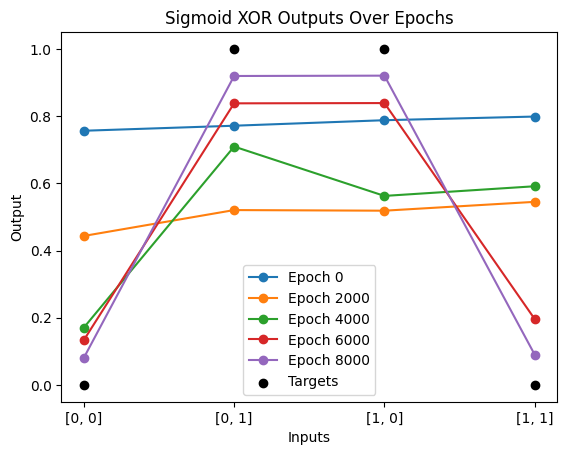

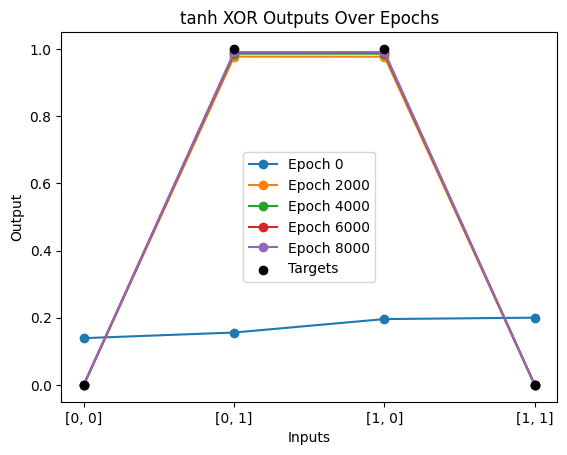

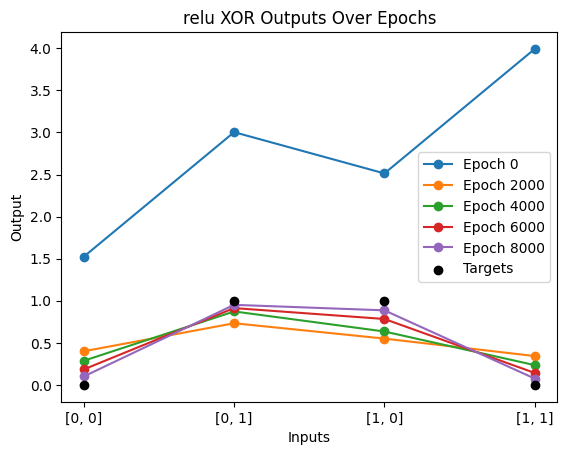

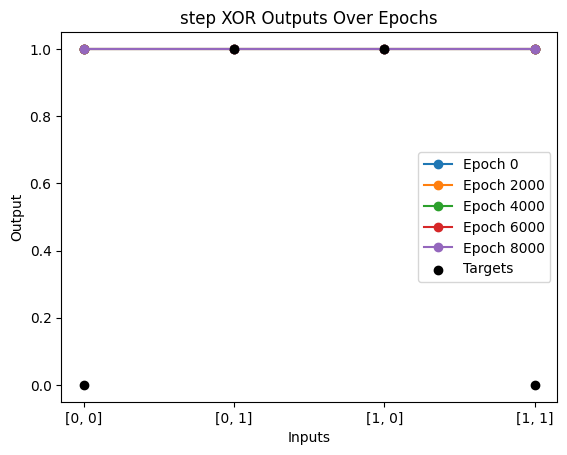

In [274]:
def plot_outputs_over_epochs(network, inputs, targets, epochs, interval, learning_rate, title):
    epoch_snapshots = []
    for epoch in range(epochs):
        for input, wanted_output in zip(inputs, targets):
            network.backward(input, wanted_output, learning_rate)
        if epoch % interval == 0:
            outputs = [network.forward(x)[0] for x in inputs]
            epoch_snapshots.append((epoch, outputs))
    
    plt.figure()
    for epoch, outputs in epoch_snapshots:
        plt.plot(range(len(inputs)), outputs, marker='o', label=f"Epoch {epoch}")
    targets_flat = [t[0] for t in targets]
    plt.scatter(range(len(inputs)), targets_flat, color='black', label="Targets", zorder=5)
    plt.xticks(range(len(inputs)), [str(x) for x in inputs])
    plt.title(title)
    plt.xlabel("Inputs")
    plt.ylabel("Output")
    plt.legend()
    plt.show()

new_sig_network = modular_neural_network(num_inputs=2, num_notes_hidden_layers=[2], num_of_outputs=1, activation="sigmoid")
plot_outputs_over_epochs(new_sig_network, inputs, targets, epochs=10000, interval=2000, learning_rate=0.1, title="Sigmoid XOR Outputs Over Epochs")

new_tan_network = modular_neural_network(num_inputs=2, num_notes_hidden_layers=[2], num_of_outputs=1, activation="tanh")
plot_outputs_over_epochs(new_tan_network, inputs, targets, epochs=10000, interval=2000, learning_rate=0.1, title="tanh XOR Outputs Over Epochs")

# relu needs more layers and a lower learing rate than the others to work properly but is good for detecting non liniair things
new_relu_network = modular_neural_network(num_inputs=2, num_notes_hidden_layers=[8], num_of_outputs=1, activation="relu")
plot_outputs_over_epochs(new_relu_network, inputs, targets, epochs=10000, interval=2000, learning_rate=0.001, title="relu XOR Outputs Over Epochs")

new_step_network = modular_neural_network(num_inputs=2, num_notes_hidden_layers=[2], num_of_outputs=1, activation="step")
plot_outputs_over_epochs(new_step_network, inputs, targets, epochs=10000, interval=2000, learning_rate=0.1, title="step XOR Outputs Over Epochs")


## Exercise 4.3 D) Iris dataset
### Prepare the data
the Iris dataset contains 150 sameples eacht with 4 features, there are 3 clases (Setosa, Versicolor, Virginica) and we want to catagorize these\
the first thing i do is import the data and normilize the data using min max norminalization (value scaled within the 0 1 range for the neral network)
then i ajust the targets to usful targets for the network, looking it up online it this called one hot encode (3 posible string outputs change into [0,0,1], [0,1,0] or [1,0,0])


In [230]:
def min_max_normalize(data):
    normalized_data = []
    for col in zip(*data): 
        min_val = min(col)
        max_val = max(col)
        normalized_col = [(x - min_val) / (max_val - min_val) if max_val > min_val else 0 for x in col]
        normalized_data.append(normalized_col)
    return list(map(list, zip(*normalized_data)))

def one_hot_encode(targets):
    classes = sorted(set(targets))
    class_map = {clas: i for i, clas in enumerate(classes)}
    encoded = [[1 if i == class_map[target] else 0 for i in range(len(classes))] for target in targets]
    return encoded


iris = fetch_ucirepo(id=53)

iris_data = iris.data.features.values.tolist()
iris_targets = iris.data.targets.values.tolist()
iris_targets = [item[0] for item in iris_targets]

iris_data_norm = min_max_normalize(iris_data)
iris_targets_norm = one_hot_encode(iris_targets)

iris_data_train, iris_data_test, iris_targets_train, iris_targets_test = train_test_split(iris_data_norm, iris_targets_norm, test_size=0.2, random_state=42)

print("First 5 normalized training data:")
for row in iris_data_train[:5]:
    print(row)

print("\nFirst 5 one-hot encoded targets:")
for row in iris_targets_train[:5]:
    print(row)


First 5 normalized training data:
[0.08333333333333327, 0.6666666666666666, 0.0, 0.04166666666666667]
[0.38888888888888895, 1.0, 0.0847457627118644, 0.12500000000000003]
[0.6666666666666666, 0.4583333333333333, 0.576271186440678, 0.5416666666666666]
[0.13888888888888887, 0.5833333333333333, 0.1016949152542373, 0.04166666666666667]
[0.027777777777777922, 0.5, 0.05084745762711865, 0.04166666666666667]

First 5 one-hot encoded targets:
[1, 0, 0]
[1, 0, 0]
[0, 1, 0]
[1, 0, 0]
[1, 0, 0]


Hier heb ik de iris data door mijn meest basic model gehaald en ik krijg nu al een acuratie van 100%, dit is een beetje saai om op te expirimenteren dus ik ga verder met de weer data van eerder
To anwser the shape and score question: i used one layer of 6 neurons since we are looking for 3 anwnser and have 4 inputs 6 seemd good to start
the acuracy i get is 100% based on the test data (where its not trained on so it doesn't know it)

In [269]:
def test_and_print_iris_network(num_notes_hidden_layers=[6], activation="sigmoid", epochs=5000, learning_rate=0.1):
    iris_network = modular_neural_network(num_inputs=4, num_notes_hidden_layers=num_notes_hidden_layers, num_of_outputs=3, activation=activation)
    iris_network.train(iris_data_train, iris_targets_train, epochs=epochs, learning_rate=learning_rate)

    correct = 0
    print("Predictions vs Targets:")
    for x, y_true in zip(iris_data_test, iris_targets_test):
        predictions = iris_network.forward(x)
        predicted_class = predictions.index(max(predictions))
        actual_class = y_true.index(max(y_true))
        print(f"Predicted: {predicted_class}, Actual: {actual_class}, Probabilities: {predictions}")
        if predicted_class == actual_class:
            correct += 1
    accuracy = correct / len(iris_data_test)
    print(f"\nFinal Accuracy: {accuracy * 100:.2f}%")

test_and_print_iris_network()

Predictions vs Targets:
Predicted: 1, Actual: 1, Probabilities: [0.0018032879496935245, 0.9946582550627445, 0.002007752609410609]
Predicted: 0, Actual: 0, Probabilities: [0.9940758580932142, 0.005196703683726064, 1.3935166737639847e-07]
Predicted: 2, Actual: 2, Probabilities: [2.106054024621259e-05, 0.0007936819457645747, 0.9998485481987671]
Predicted: 1, Actual: 1, Probabilities: [0.0011696194243981997, 0.9883215219158583, 0.0071407334266177696]
Predicted: 1, Actual: 1, Probabilities: [0.0011269402201402338, 0.9905756781892162, 0.006007187628736469]
Predicted: 0, Actual: 0, Probabilities: [0.9915614301637818, 0.008211109366423587, 1.7129754429305203e-07]
Predicted: 1, Actual: 1, Probabilities: [0.007269949942788476, 0.9951906664723579, 0.00014877580831829308]
Predicted: 2, Actual: 2, Probabilities: [6.34851480913168e-05, 0.003789836647857207, 0.9962023394776027]
Predicted: 1, Actual: 1, Probabilities: [0.00036013444029985844, 0.7529032335359467, 0.252362764744836]
Predicted: 1, Actual

Ik beloof dat ik np nergens anders gebruik maar dit is hoe we de import van de data gekregen hebben dus die neem ik nog wel even over

In [232]:
import numpy as np

data = np.genfromtxt('dataset1.csv', delimiter=';', usecols=[1,2,3,4,5,6,7], converters={5: lambda s: 0 if s == b"-1" else float(s), 7: lambda s: 0 if s == b"-1" else float(s)})
dates = np.genfromtxt('dataset1.csv', delimiter=';', usecols=[0])
labels = []
for label in dates:
  if label < 20000301:
    labels.append('winter')
  elif 20000301 <= label < 20000601:
    labels.append('lente')
  elif 20000601 <= label < 20000901:
    labels.append('zomer')
  elif 20000901 <= label < 20001201:
    labels.append('herfst')
  else:
    labels.append('winter')
labels = np.array(labels)


validation_data = np.genfromtxt('validation1.csv', delimiter=';', usecols=[1,2,3,4,5,6,7], converters={5: lambda s: 0 if s == b"-1" else float(s), 7: lambda s: 0 if s == b"-1" else float(s)})
validation_dates = np.genfromtxt('validation1.csv', delimiter=';', usecols=[0])
validation_labels = []
for label in validation_dates:
  if label < 20010301:
    validation_labels.append('winter')
  elif 20010301 <= label < 20010601:
    validation_labels.append('lente')
  elif 20010601 <= label < 20010901:
    validation_labels.append('zomer')
  elif 20010901 <= label < 20011201:
    validation_labels.append('herfst')
  else:
    validation_labels.append('winter')
validation_labels = np.array(validation_labels)

combined_data = np.vstack((data, validation_data))
combined_labels = np.concatenate((labels, validation_labels))

In [233]:
wether_data_norm = min_max_normalize(combined_data)
wether_targers = one_hot_encode(combined_labels)

wether_data_train,wether_data_test, wether_targets_train, wether_targets_test = train_test_split(wether_data_norm, wether_targers, test_size=0.2, random_state=42)

print(wether_data_train[:5])
print(wether_targets_train[:5])

print(wether_data_test[:5])
print(wether_targets_test[:5])

[[0.7741935483870968, 0.48534201954397393, 0.6042402826855123, 0.40233236151603496, 0.33548387096774196, 0.20714285714285716, 0.10469314079422383], [0.24731182795698925, 0.19218241042345277, 0.17667844522968199, 0.14868804664723032, 0.05806451612903226, 0.0, 0.0], [0.6451612903225806, 0.4560260586319218, 0.5759717314487632, 0.37026239067055394, 0.08387096774193549, 0.10714285714285714, 0.032490974729241874], [0.4731182795698925, 0.2768729641693811, 0.3286219081272085, 0.20408163265306123, 0.4064516129032258, 0.4714285714285714, 0.5234657039711191], [0.20430107526881722, 0.6905537459283387, 0.7102473498233216, 0.6472303206997084, 0.6903225806451613, 0.0, 0.0]]
[[1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
[[0.25806451612903225, 0.3322475570032573, 0.4204946996466431, 0.2886297376093295, 0.5225806451612903, 0.36428571428571427, 0.4043321299638989], [0.3548387096774194, 0.2182410423452769, 0.31095406360424027, 0.17784256559766765, 0.38064516129032255, 0.2285714285

## Exersice 4.3 E) Weather data [optional]

Here i so the same as for iris data to see how wel the most basic implementation works for this one, i run it a few times and it comes out at around 50-65% acuracy, this is fun to play around with and try to improve

In [234]:
def test_and_print_wether_network(num_notes_hidden_layers=[8], activation="sigmoid", epochs=5000, learning_rate=0.1):
    wether_network = modular_neural_network(num_inputs=7, num_notes_hidden_layers=num_notes_hidden_layers, num_of_outputs=4, activation=activation)
    wether_network.train(wether_data_train, wether_targets_train, epochs=epochs, learning_rate=learning_rate)

    correct = 0
    print("Predictions vs Targets:")
    for x, y_true in zip(wether_data_test, wether_targets_test):
        predictions = wether_network.forward(x)
        predicted_class = predictions.index(max(predictions))
        actual_class = y_true.index(max(y_true))
        print(f"Predicted: {predicted_class}, Actual: {actual_class}, Probabilities: {predictions}")
        if predicted_class == actual_class:
            correct += 1
    accuracy = correct / len(wether_targets_test)
    print(f"\nFinal Accuracy: {accuracy * 100:.2f}%")

test_and_print_wether_network()

Predictions vs Targets:
Predicted: 1, Actual: 2, Probabilities: [0.016772594837837607, 0.31112224180231923, 0.23077569935884293, 0.0009694587958593226]
Predicted: 2, Actual: 1, Probabilities: [0.0005214825232364648, 0.15543402616369942, 0.8903276161268806, 4.473275793635189e-05]
Predicted: 2, Actual: 2, Probabilities: [0.30179804978200125, 0.2109550288873883, 0.4223984942387084, 0.01891053242599728]
Predicted: 0, Actual: 0, Probabilities: [0.5275264691434262, 0.054180675815390496, 0.11875504593638486, 0.15311328688290785]
Predicted: 1, Actual: 1, Probabilities: [0.2896392254285828, 0.6452112305800797, 0.25306017609606984, 0.017253962841242792]
Predicted: 0, Actual: 0, Probabilities: [0.3619819281219975, 0.26290546834527123, 0.12876121604264024, 0.070530078737112]
Predicted: 3, Actual: 3, Probabilities: [0.005236278131167397, 0.00820034988507405, 6.495111382990427e-10, 0.7264863636764962]
Predicted: 2, Actual: 2, Probabilities: [5.213480341424681e-05, 0.11703452172884542, 0.958985423408

So i created a function that trains the networks and returns the network so i can train a few networks with different 

In [241]:
def test_and_store_wether_network(num_notes_hidden_layers=[8], activation="sigmoid", epochs=5000, learning_rate=0.1):
    wether_network = modular_neural_network(num_inputs=7, num_notes_hidden_layers=num_notes_hidden_layers, num_of_outputs=4, activation=activation)
    wether_network.train(wether_data_train, wether_targets_train, epochs=epochs, learning_rate=learning_rate)
    return wether_network

def Print_wether_network_result(network):
    correct = 0
    for x, y_true in zip(wether_data_test, wether_targets_test):
        predictions = network.forward(x)
        predicted_class = predictions.index(max(predictions))
        actual_class = y_true.index(max(y_true))
        # print(f"Predicted: {predicted_class}, Actual: {actual_class}, Probabilities: {predictions}") # NOTE: uncoment if you want to see all the predictions and resuslts
        if predicted_class == actual_class:
            correct += 1
    accuracy = correct / len(wether_targets_test)
    print(f"Final Accuracy: {accuracy * 100:.2f}%")
    cost = network.mean_squared_error_cost(wether_data_test,wether_targets_test)
    print(f"Final cost: {cost}\n")

In [246]:
sig_network_1000_8 = test_and_store_wether_network([8],"sigmoid", 1000, .1)

In [247]:
tanh_network_1000_8 = test_and_store_wether_network([8],"tanh", 1000, .1)

In [259]:
relu_network_1000_8 = test_and_store_wether_network([8], "relu", 1000, .001)

In [260]:
print("sigmoid, epoch 1000, 1 layer, 8 neurons")
Print_wether_network_result(sig_network_1000_8)
print("tanh, epoch 1000, 1 layer, 8 neurons")
Print_wether_network_result(tanh_network_1000_8)
print("relu, epoch 1000, 1 layer, 8 neurons")
Print_wether_network_result(relu_network_1000_8)

sigmoid, epoch 1000, 1 layer, 8 neurons
Final Accuracy: 62.77%
Final cost: 0.1282362733683038

tanh, epoch 1000, 1 layer, 8 neurons
Final Accuracy: 51.06%
Final cost: 0.17564554440278837

relu, epoch 1000, 1 layer, 8 neurons
Final Accuracy: 57.45%
Final cost: 0.1436716071806981



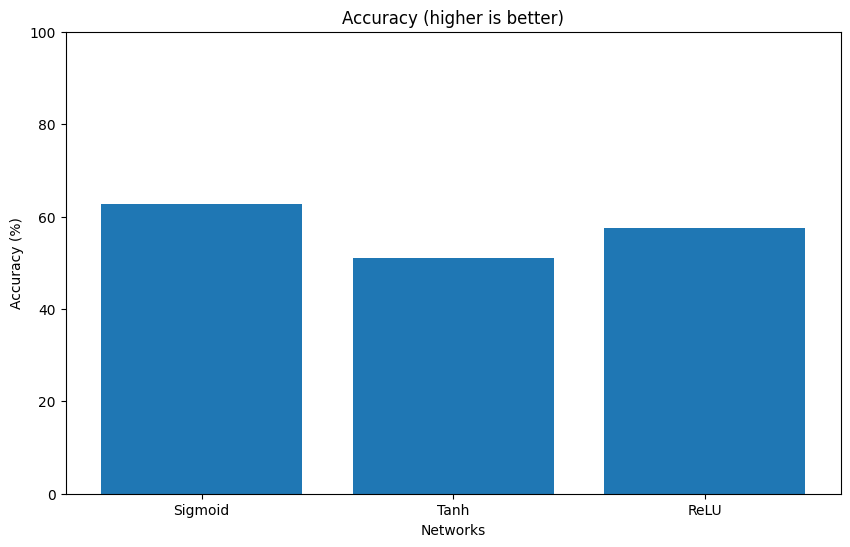

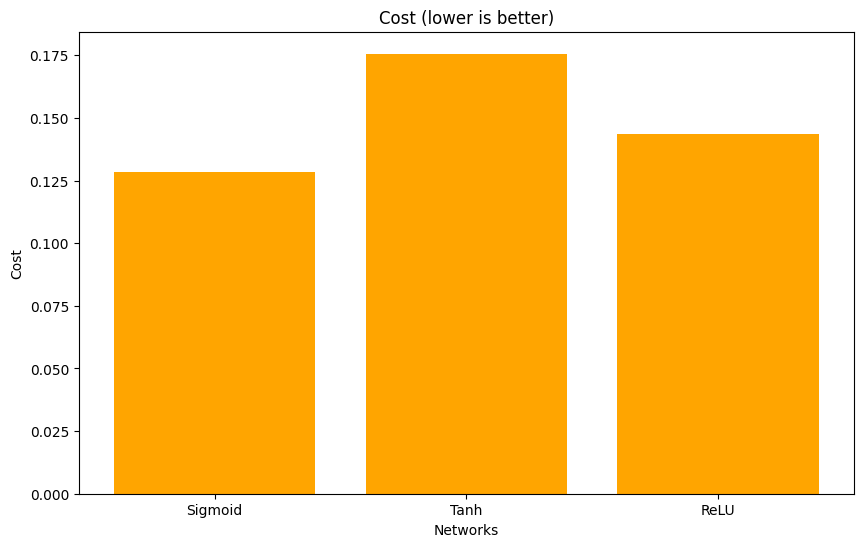

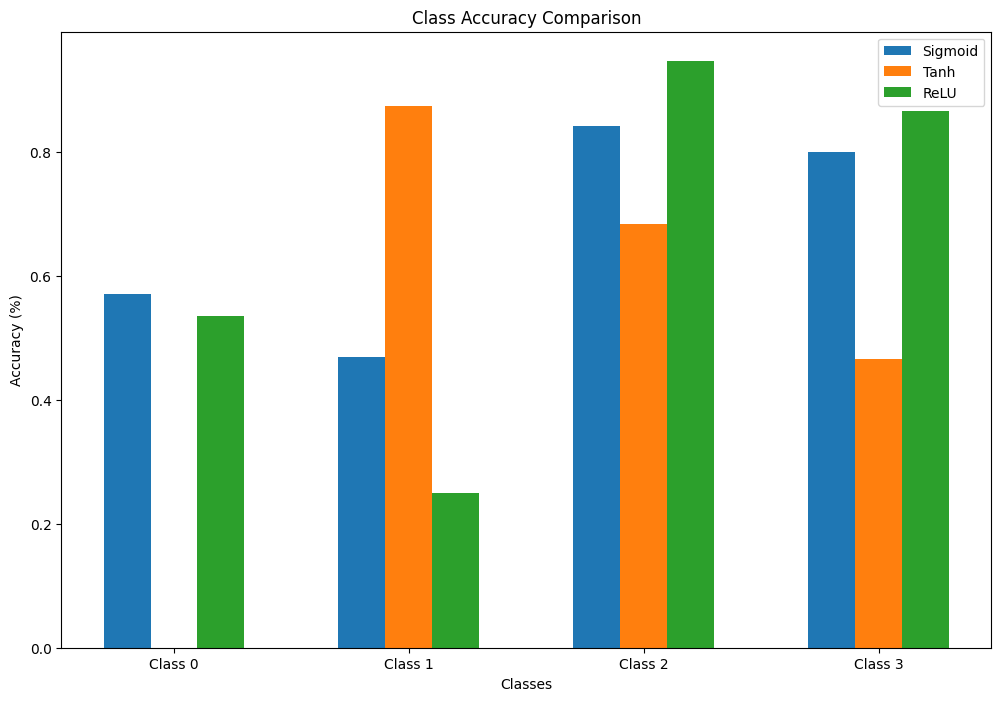

In [ ]:
def compare_multiple_networks(networks, test_data, test_targets, labels):
    results = {
        "labels": labels,
        "accuracies": [],
        "costs": [],
        "class_accuracies": []
    }
    for network in networks:
        y_true = []
        y_pred = []
        
        for x, y in zip(test_data, test_targets):
            predicted_class = max(enumerate(network.forward(x)), key=lambda p: p[1])[0]
            actual_class = max(enumerate(y), key=lambda p: p[1])[0]
            y_true.append(actual_class)
            y_pred.append(predicted_class)
        
        correct = sum(1 for t, p in zip(y_true, y_pred) if t == p)
        accuracy = (correct / len(y_true)) * 100
        results["accuracies"].append(accuracy)
        
        cost = network.mean_squared_error_cost(test_data, test_targets)
        results["costs"].append(cost)
        
        conf_matrix = confusion_matrix(y_true, y_pred)
        class_accuracies = [
            conf_matrix[i][i] / sum(conf_matrix[i]) if sum(conf_matrix[i]) > 0 else 0
            for i in range(len(conf_matrix))
        ]
        results["class_accuracies"].append(class_accuracies)
    
    plt.figure(figsize=(10, 6))
    plt.bar(results["labels"], results["accuracies"])
    plt.title("Accuracy (higher is better)")
    plt.xlabel("Networks")
    plt.ylabel("Accuracy (%)")
    plt.ylim(0, 100)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.bar(results["labels"], results["costs"], color='orange')
    plt.title("Cost (lower is better)")
    plt.xlabel("Networks")
    plt.ylabel("Cost")
    plt.show()
    
    num_classes = len(results["class_accuracies"][0])
    width = 0.2
    x = range(num_classes)
    
    plt.figure(figsize=(12, 8))
    for i, class_accuracies in enumerate(results["class_accuracies"]):
        plt.bar(
            [pos + i * width for pos in x],
            class_accuracies,
            width=width,
            label=results["labels"][i]
        )
    plt.title("Class Accuracy Comparison")
    plt.xlabel("Classes")
    plt.ylabel("Accuracy (%)")
    plt.xticks(
        [pos + width * (len(networks) - 1) / 2 for pos in x],
        [f"Class {i}" for i in range(num_classes)]
    )
    plt.legend()
    plt.show()

networks = [sig_network_1000_8, tanh_network_1000_8, relu_network_1000_8]
labels = ["Sigmoid", "Tanh", "ReLU"]
compare_multiple_networks(networks, wether_data_test, wether_targets_test, labels)



In [264]:
sig_network_3000_16_8 = test_and_store_wether_network([16,8], "sigmoid", 3000, .05)

In [265]:
tanh_network_3000_16_8 = test_and_store_wether_network([16,8],"tanh", 3000, .05)

In [267]:
relu_network_3000_16_8 = test_and_store_wether_network([16,8], "relu", 3000, .0005)

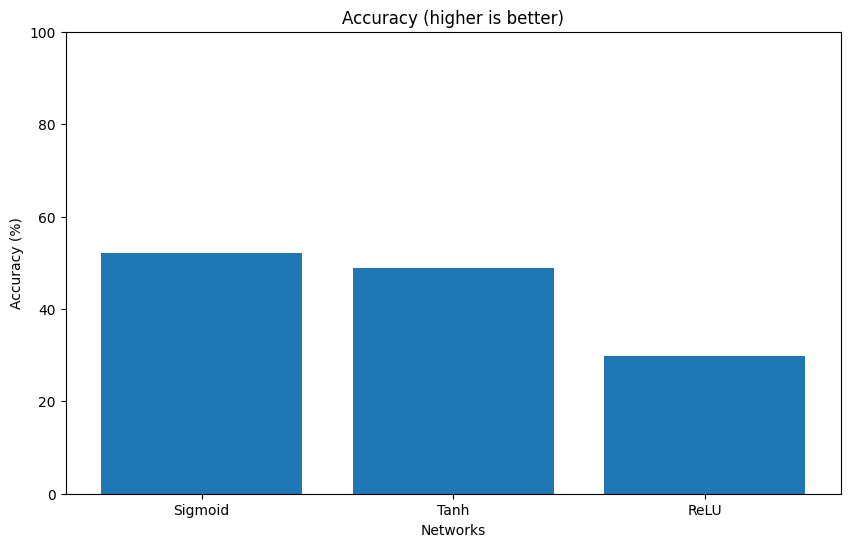

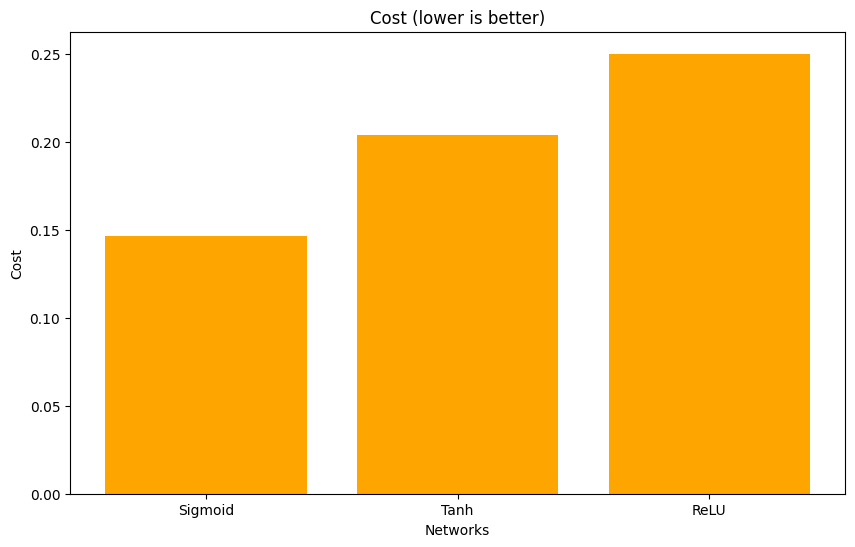

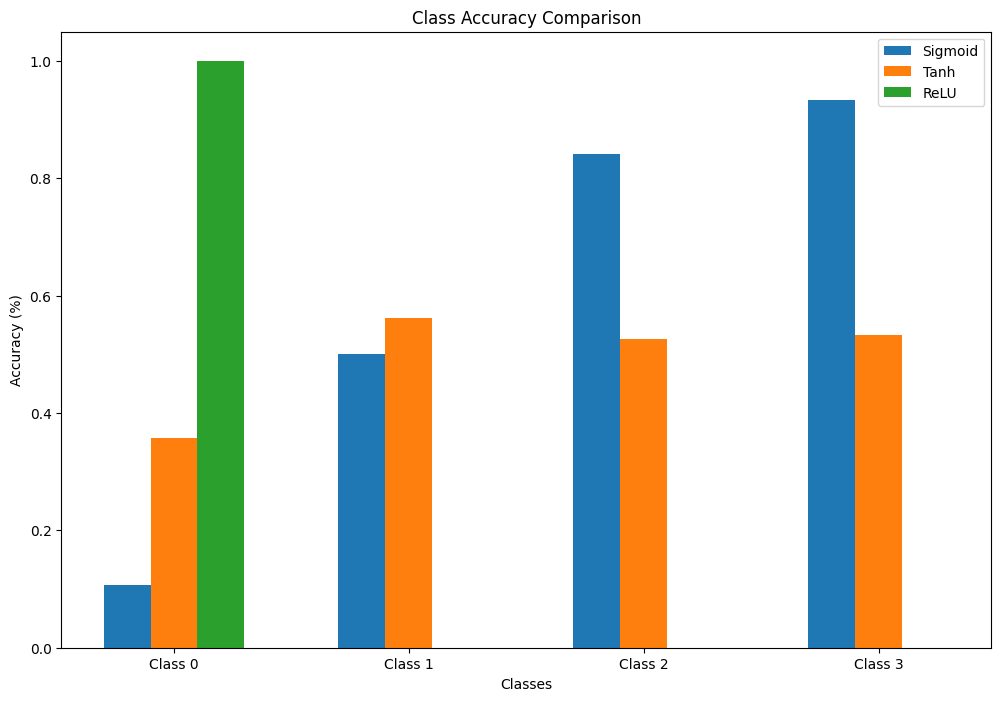

In [268]:
networks = [sig_network_3000_16_8, tanh_network_3000_16_8, relu_network_3000_16_8]
labels = ["Sigmoid", "Tanh", "ReLU"]
compare_multiple_networks(networks, wether_data_test, wether_targets_test, labels)

In [270]:
sig_network_3000_4_4 = test_and_store_wether_network([4,4], "sigmoid", 3000, .1)
tanh_network_3000_4_4 = test_and_store_wether_network([4,4],"tanh", 3000, .1)
relu_network_3000_4_4 = test_and_store_wether_network([4,4], "relu", 3000, .001)

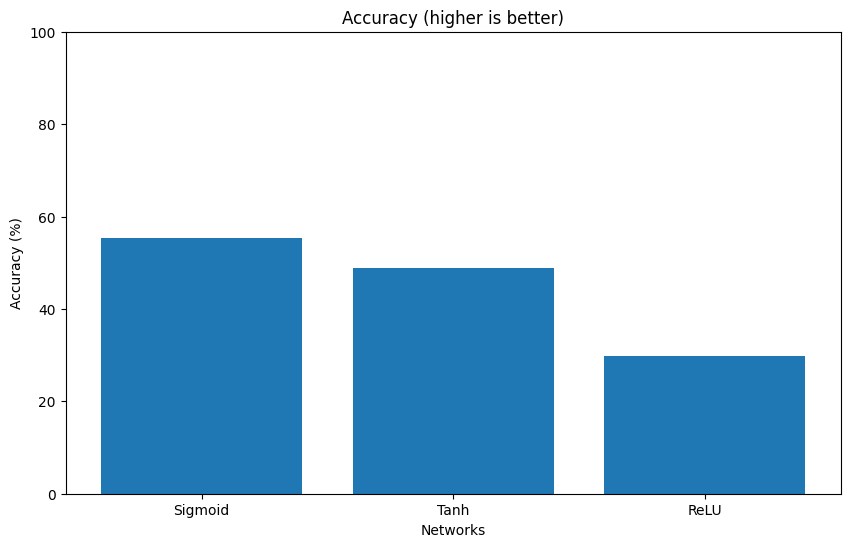

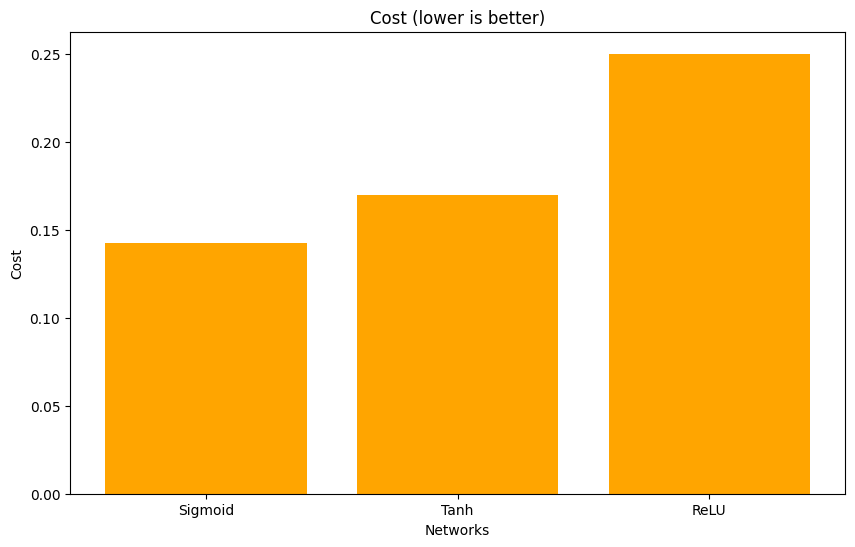

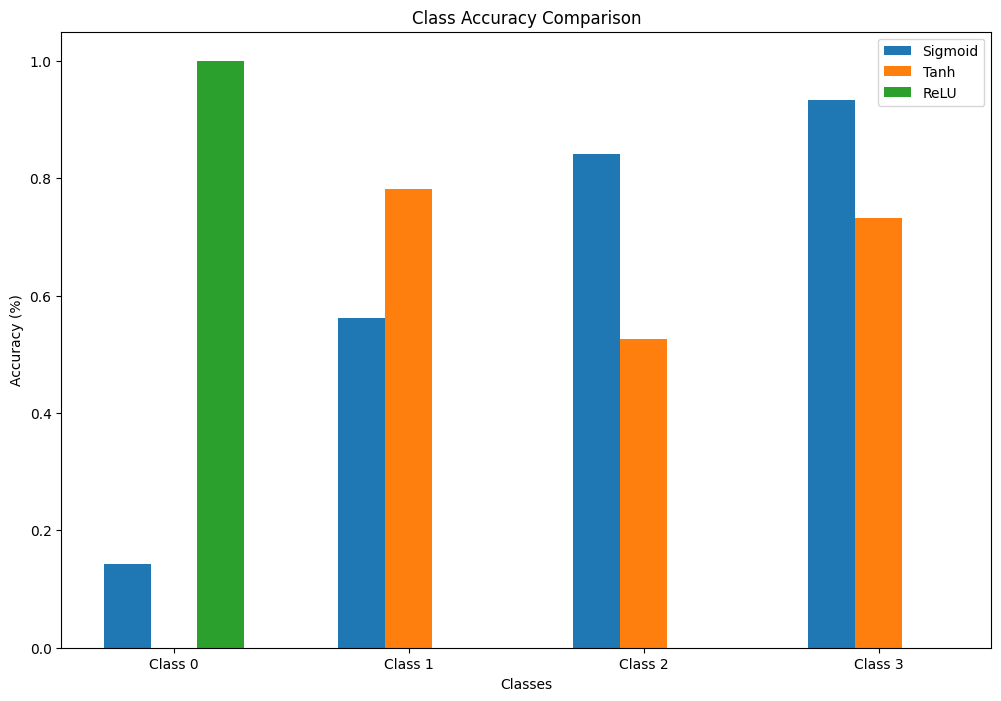

In [271]:
networks = [sig_network_3000_4_4, tanh_network_3000_4_4, relu_network_3000_4_4]
labels = ["Sigmoid", "Tanh", "ReLU"]
compare_multiple_networks(networks, wether_data_test, wether_targets_test, labels)

In [272]:
sig_network_4000_4 = test_and_store_wether_network([4], "sigmoid", 4000, .1)
sig_network_4000_4_4 = test_and_store_wether_network([4,4], "sigmoid", 4000, .1)
sig_network_4000_4_4_4 = test_and_store_wether_network([4,4,4], "sigmoid", 4000, .1)
sig_network_4000_28_14_4 = test_and_store_wether_network([28,14,4], "sigmoid", 4000, .1)

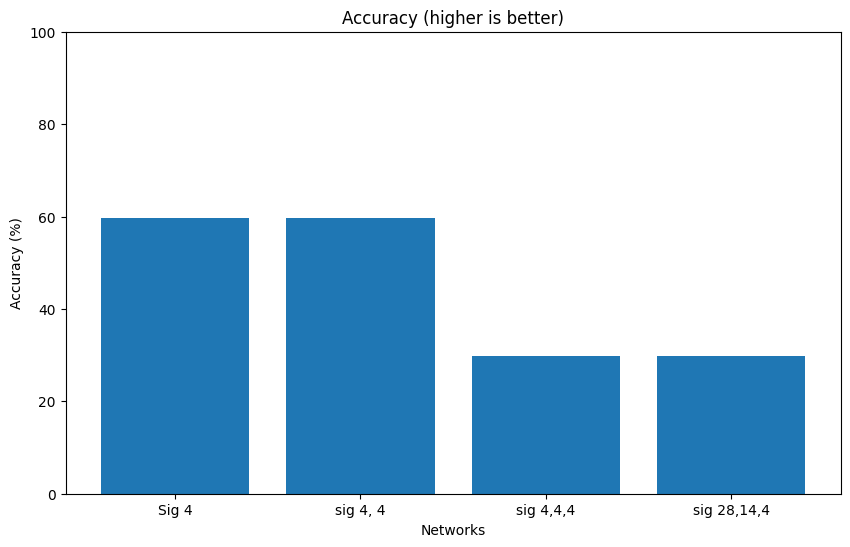

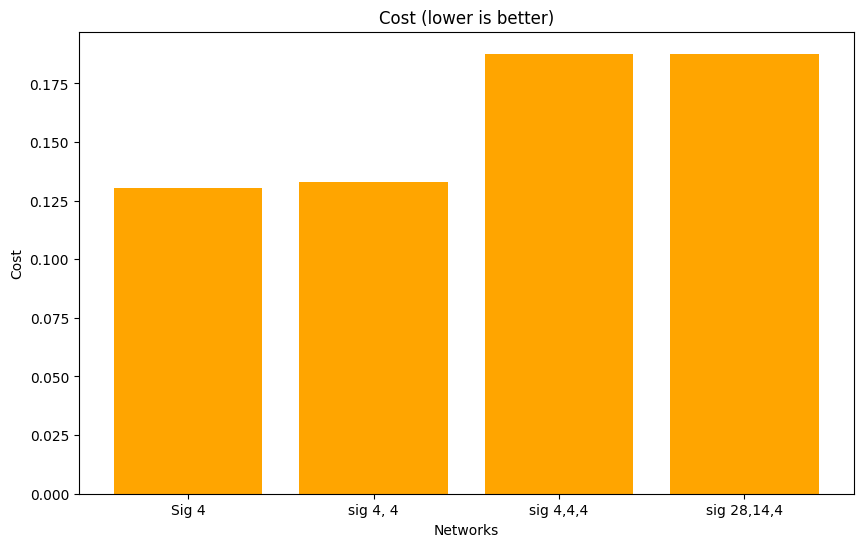

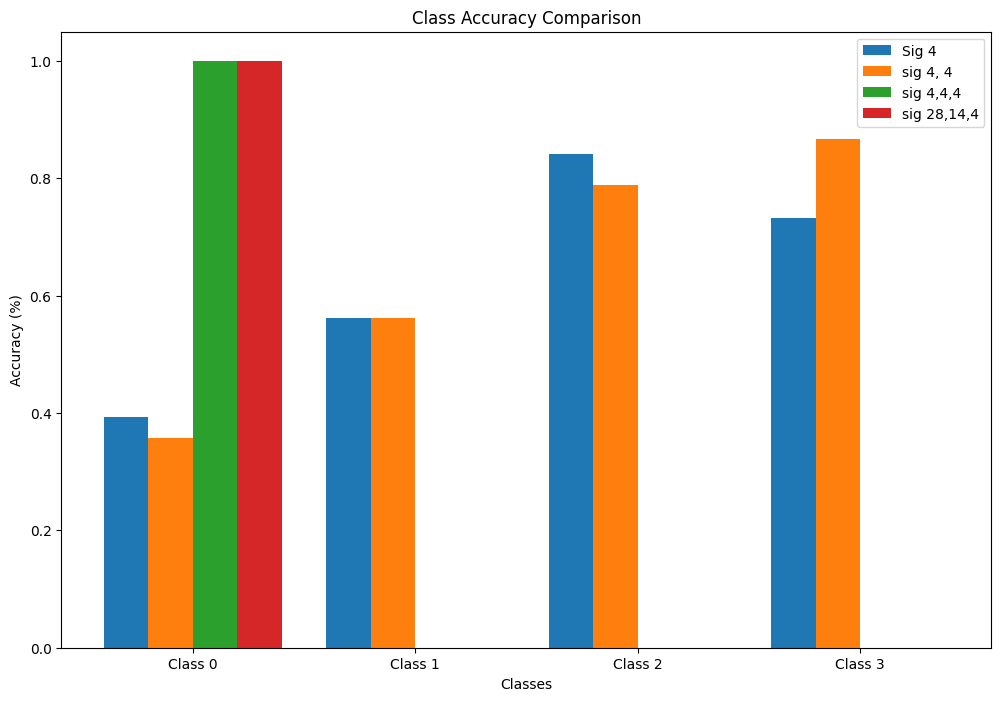

In [273]:
networks = [sig_network_4000_4, sig_network_4000_4_4, sig_network_4000_4_4_4,sig_network_4000_28_14_4]
labels = ["Sig 4", "sig 4, 4", "sig 4,4,4", "sig 28,14,4"]
compare_multiple_networks(networks, wether_data_test, wether_targets_test, labels)

## End

This was my assigment, at the end i preformed differen networks to see what the effect of some changes are in the results, you can see those results in the plots.\
to anwser the question if it worked better than K-NN, for me yes, the best results i got where better than the accuracy of my K-nn network and its cool to see the differences between these techniques\
\
other than that i found that having more layers i got wors results, i think my data may have a wors devision of test and train data since it alywas goes bad for class 0, or there is something else going on, but for now i think my research and work is enough :)